In [1]:
#HATE SPEECH DETECTION

In [2]:
#create dataframe

In [3]:
import pandas as pd
df=pd.read_csv("/content/Hate Speech Detection using Python.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
df.shape

(24783, 7)

In [6]:
df.size

173481

In [7]:
#NON HATE TWEETS
non_hate_tweets = df[df.hate_speech == 0]
non_hate_tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
#non hate tweets count
nht=non_hate_tweets.count()
nht

Unnamed: 0            19790
count                 19790
hate_speech           19790
offensive_language    19790
neither               19790
class                 19790
tweet                 19790
dtype: int64

In [9]:
#HATE TWEETS
hate_tweets = df[df.hate_speech == 1]
hate_tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."
14,14,3,1,2,0,1,""" bitch get up off me """
17,17,3,1,2,0,1,""" bitch who do you love """
49,49,3,1,2,0,1,""" these hoes like niggas that spend money not ..."


In [10]:
#hate tweet count
ht= hate_tweets.count()
ht

Unnamed: 0            3419
count                 3419
hate_speech           3419
offensive_language    3419
neither               3419
class                 3419
tweet                 3419
dtype: int64

In [11]:
#data visualisation

In [12]:
'''import matplotlib.pyplot as plt
labels = ['hate tweets', 'non hate tweets']
sizes = [ht, 100-nht]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['hotpink','khaki'])
plt.title('TWEETS')
plt.show()
'''

"import matplotlib.pyplot as plt\nlabels = ['hate tweets', 'non hate tweets']\nsizes = [ht, 100-nht]\nplt.figure(figsize=(6, 6))\nplt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['hotpink','khaki'])\nplt.title('TWEETS')\nplt.show()\n"

<Axes: xlabel='hate_speech', ylabel='count'>

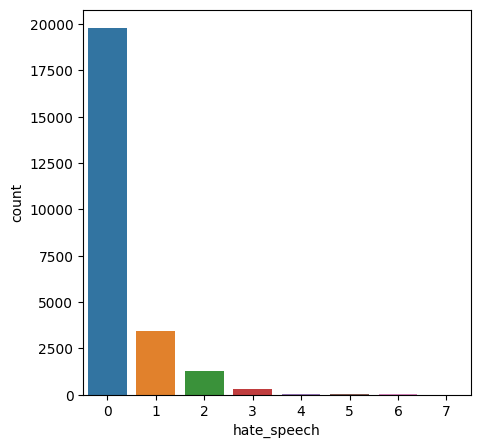

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
sns.countplot(x='hate_speech', data= df)

In [14]:
#divide the data into ip and op

In [15]:
x=df['tweet']

In [16]:
y=df['hate_speech']

In [17]:
#train and test the variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [19]:
#importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [20]:
#applying classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machines', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', MultinomialNB())
]

In [ ]:
from sklearn.metrics import accuracy_score
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)*100
    print(f'Classifier: {clf_name}')
    print(f'predicted: {y_pred}')
    print(f'Accuracy: {acc}')
    print('-' * 50)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
predicted: [0 0 0 ... 0 0 0]
Accuracy: 80.49223320556789
--------------------------------------------------
